# Часть I: О теореме Байеса

## 1. Прокурор

Ошибка прокурора заключается в том, что он считает достаточным учесть вероятность, что у человека редкая группа крови (которой обладает $ 1% $ населения города). При этом он не учитывает тот факт, что $ 1% $ процент от населения города – это $ 0,1 * 1000000 = 10000 $ человек.

В качестве правильной вероятности необходимо было рассматривать оценку условной вероятности, что человек является убийцей при условии, что у него редкая группа крови.


## 2. Адвокат

Ошибка адвоката заключается предложение исключить данную информацию из материалов дела. Данное предложение является ошибкой, потому что наличие у подозреваемого редкой крови увеличивает его вероятность быть виновным, т.к. редкой кровью обладают лишь $ 10000 $ жителей города, а не миллион (из условия), т.е. количество сокращается в $ 100 $ раз.


## 3. Тест на болезнь

Введём обозначения:

* d - человек болен (соответственно, $ \overline{d} $ - не болен)
* t - тест положительный (соответственно, $ \overline{t} $ - тест отрицательный)

А также рассмотрим следующие условные вероятности по теореме Байеса.

Вероятность, что человек болен болен при условии положительного теста:

$$ 
p(d|t)=\frac{p(t|d)p(d)}{p(t)}=\frac{p(t|d)p(d)}{p(t|d)p(d) + p(t|\overline{d})p(\overline{d})}
$$

Вероятность, что человек болен при условии отрицательного теста:

$$
p(d|\overline{t})=\frac{p(\overline{t}|d)p(d)}{p(\overline{t})}=\frac{p(\overline{t}|d)p(d)}{p(\overline{t}|d)p(d) + p(\overline{t}|\overline{d})p(\overline{d})}
$$

С учётом начальных условий получаем:

$$ 
p(d|t)=\frac{0.95 \cdot 0.01}{0.95 \cdot 0.01 + 0.05 \cdot 0.99} \approx 0.16
$$

<br>

$$
p(d|\overline{t})=\frac{0.05 \cdot 0.01}{0.05 \cdot 0.01 + 0.95 \cdot 0.99} \approx 0.00053
$$

Теперь рассмотрим ложноположительную $ p(t|\overline{d}) $ и ложноотрицательную $ p(\overline{t}|d) $ ошибки с учётом максимальной вероятности в $ 0.05 $ в обоих случаях. Рассмотрим по очереди уменьшение ошибок на $ 0.01 $.

1 Уменьшим $ p(t|\overline{d}) $

$$ 
p(t|\overline{d}) = 0.04 => p(\overline{t}|\overline{d}) = 1 - p(t|\overline{d}) = 0.96
$$

Тогда получим, что:
$$
p(d|t) \approx 0.19348
$$
$$
p(d|\overline{t}) \approx 0.00053
$$

Соответственно, $ p(d|t) $ увеличилось на $ 0.03348 $, тогда как $ p(d|\overline{t}) $ уменьшилось на $ 0 $ (с учётом $ 5 $-го знака).

2 Уменьшим $ p(\overline{t}|d) $

$$
p(\overline{t}|d) = 0.04 => p(t|d) = 1 - p(\overline{t}|d) = 0.96
$$

Тогда получим, что:
$$
p(d|t) \approx 0.16244
$$
$$
p(d|\overline{t}) \approx 0.00043
$$

Соответственно, $ p(d|t) $ увеличилось на $ 0.00244 $, тогда как $ p(d|\overline{t}) $ уменьшилось на $ 0.0001 $.

## Итог

Таким образом, учитывая уровень прироста $ p(d|t) $ и уровень уменьшение $ p(d|\overline{t}) $, врачам лучше сосредоточиться на уменьшении вероятности ложноположительной ошибки (false positives), т.е. $ p(t|\overline{d}) $.

И немного графиков

In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
P_D = 0.01
P_NOT_D = 1 - P_D


def probabilities(p_t_not_d=0.05, p_not_t_d=0.05):
    """
    Вероятности p(d|t) и p(d|not(t))
    Расматриваются изменения только одной из двух вероятностей
    
    :param: p_t_not_d: p(t|not(d))
    :param: p_not_t_d: p(not(t)|d)
    
    :returns: p(d|t), p(d|not(t)) 
    """

    p_not_t_not_d = 1 - p_t_not_d  # p(not(t)|not(d))
    p_t_d = 1 - p_not_t_d  # p(t|d)

    p_d_t = (p_t_d * P_D) / (p_t_d * P_D + p_t_not_d * P_NOT_D)
    p_d_not_t = (p_not_t_d * P_D) / (p_not_t_d * P_D + p_not_t_not_d * P_NOT_D)

    return p_d_t, p_d_not_t


def generict_collection_prob(collection_p, use_p_t_not_d=True):
    """
    Расчёт ошибок FalsePositive и FalseNegative в интервалах [0, 0.5]
    (по условию задачи)

    :param: collection_p - список вероятностей в промежутке [0, 0.5]
    :param: use_p_t_not_d - True - меняется p(t|not(d)), False - p(not(t)|d)

    :returns: (список вероятностей p(d|t), список вероятностей p(d|not(t)))
    """

    collection_p_d_t, collection_p_d_not_t = [], []
    for p in collection_p:
        if use_p_t_not_d:
            p_d_t, p_d_not_t = probabilities(p_t_not_d=p)
        else:
            p_d_t, p_d_not_t = probabilities(p_not_t_d=p)

        collection_p_d_t.append(p_d_t)
        collection_p_d_not_t.append(p_d_not_t)

    return collection_p_d_t, collection_p_d_not_t

In [3]:
collection_p = np.linspace(0, 0.05, num=100)

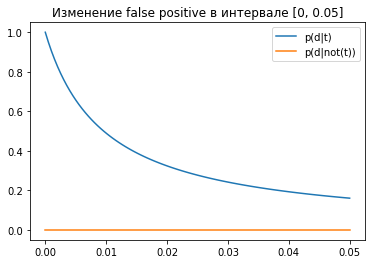

In [4]:
collection_p_d_t, collection_p_d_not_t = generict_collection_prob(collection_p)

plt.plot(collection_p, collection_p_d_t, label='p(d|t)')
plt.plot(collection_p, collection_p_d_not_t, label='p(d|not(t))')
plt.title('Изменение false positive в интервале [0, 0.05]')
plt.legend()
plt.show()

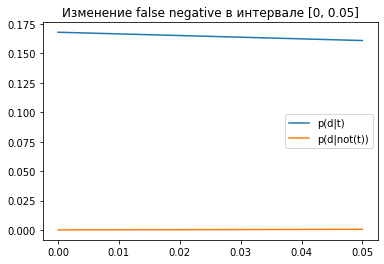

In [5]:
collection_p_d_t, collection_p_d_not_t = generict_collection_prob(collection_p, 
                                                                  use_p_t_not_d=False)

plt.plot(collection_p, collection_p_d_t, label='p(d|t)')
plt.plot(collection_p, collection_p_d_not_t, label='p(d|not(t))')
plt.title('Изменение false negative в интервале [0, 0.05]')
plt.legend()
plt.show()

# Часть II: О линейной регрессии

## 1. Подготовка данных по COVID-19

Данные взяты с [ресурса](https://ourworldindata.org/coronavirus-source-data)

In [6]:
FILENAME_COVID = 'owid-covid-data.csv'
DATE_FROM = datetime.datetime(year=2020, month=3, day=3)
DATE_TO = datetime.datetime(year=2020, month=4, day=21)

df = pd.read_csv(FILENAME_COVID, index_col=None, header=0)

df = df[df['location'] == 'Russia']
df = df[['date', 'new_cases', 'total_cases']]

df['date'] = pd.to_datetime(df['date'])
df['new_cases'] = df['new_cases'].replace({0: 1})

df_50 = df[(df['date'] >= DATE_FROM) & (df['date'] <= DATE_TO)]

df.reset_index(drop=True, inplace=True)
df_50.reset_index(drop=True, inplace=True)  # 50 дней

df_50.describe()

,new_cases,total_cases
count,50.000000,50.000000
mean,1055.300000,8202.460000
std,1610.954556,13530.534343
min,1.000000,3.000000
25%,18.750000,69.750000
50%,212.000000,1150.000000
75%,1388.000000,9766.250000
max,6060.000000,52763.000000


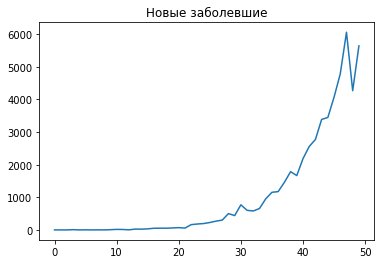

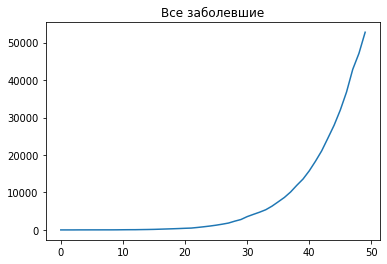

In [7]:
plt.plot(df_50.index, df_50['new_cases'])
plt.title('Новые заболевшие')
plt.show()

plt.plot(df_50.index, df_50['total_cases'])
plt.title('Все заболевшие')
plt.show()

## 2. Построение графиков целевых переменных

In [8]:
x = np.array([i + 1 for i in range(df_50.shape[0])]).reshape(-1, 1)
ln_y_total_cases = np.log(df_50['total_cases'])
ln_y_new_cases = np.log(df_50['new_cases'])

### 2a Обучение модели с экспоненциальным ростом числа заболевших

In [9]:
def fit_and_plot_predict_linreg(x, y, ln_y, plot_title):
    """Обучение и построение регрессионной оценки (linear regression)"""

    model = LinearRegression()
    model.fit(x, ln_y)

    print('function:')
    print(f'y = e^({round(model.coef_[0], 4)}x + {round(model.intercept_, 4)})', end='\n' * 2)

    predict_y = lambda x: np.exp(model.coef_[0] * x + model.intercept_)

    plt.plot(x, y, label='исходные данные')
    plt.plot(x, [predict_y(i) for i in x.ravel()], label='регрессионная оценка')
    plt.title(plot_title)
    plt.legend()
    plt.show()

function:
y = e^(0.1983x + 1.6224)



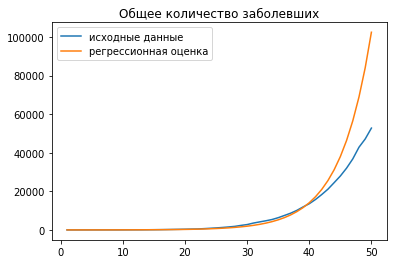

function:
y = e^(0.186x + 0.1347)



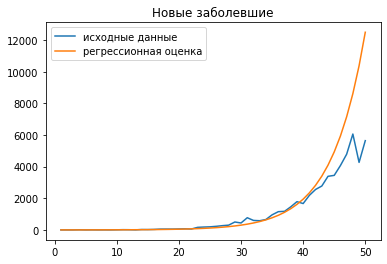

In [10]:
fit_and_plot_predict_linreg(x, df_50['total_cases'], ln_y_total_cases, 'Общее количество заболевших')
fit_and_plot_predict_linreg(x, df_50['new_cases'], ln_y_new_cases, 'Новые заболевшие')

### 2b Апостериорное распределение параметров

In [11]:
def bayesian_update(mu, sigma, x, y, sigma_noise=0.15):
    """Обновление мат. ожидания и дисперсии"""

    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(
        np.transpose(x_matrix), np.array([y])))
    return mu_n, sigma_n


def fit_and_plot_predict_bays(x_ravel, y, ln_y, plot_title):
    """Обучение и построение регрессионной оценки (bayesian update)"""

    current_mu, current_sigma = np.array([0, 0]), 2 * np.array([[1, 0], [0, 1]])

    for px, py in zip(x_ravel, ln_y):
        current_mu, current_sigma = bayesian_update(current_mu, current_sigma, px, py)

    print(f'y = e^({round(current_mu[1], 4)}x + {round(current_mu[0], 4)})', end='\n' * 2)
    print(current_mu)
    print(current_sigma)

    func = lambda x: np.exp(current_mu[0] + current_mu[1] * x)

    plt.plot(x, y, label='исходные данные')
    plt.plot(x, [func(i) for i in x_ravel], label='регрессионная оценка')
    plt.title(plot_title)
    plt.legend()
    plt.show()

    return current_mu, current_sigma

y = e^(0.1983x + 1.6209)

[1.62094819 0.19833536]
[[ 1.85338142e-03 -5.50509188e-05]
 [-5.50509188e-05  2.15934530e-06]]


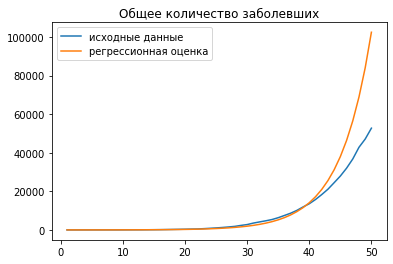

y = e^(0.186x + 0.1346)

[0.1346047 0.1859666]
[[ 1.85338142e-03 -5.50509188e-05]
 [-5.50509188e-05  2.15934530e-06]]


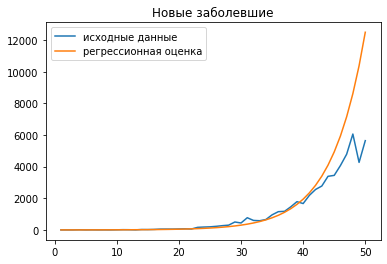

(array([0.1346047, 0.1859666]), array([[ 1.85338142e-03, -5.50509188e-05],
        [-5.50509188e-05,  2.15934530e-06]]))

In [12]:
current_mu, current_sigma = fit_and_plot_predict_bays(x.ravel(), df_50['total_cases'], ln_y_total_cases, 'Общее количество заболевших')
fit_and_plot_predict_bays(x.ravel(), df_50['new_cases'], ln_y_new_cases, 'Новые заболевшие')

### 2c Сэмплирование экспонент, построение графиков

In [13]:
def plot_sample_exp(x, mu, sigma, n=200, lw=0.1, figsize=(15, 8)):
    """
    Нарисовать сэмплы экспонент со случайными параметрами
    распределёнными по нормальному закону распределению с параметрами
    mu и sigma в качестве мат. ожидания и дисперсии
    """

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()

    collection_weights = np.random.multivariate_normal(mu, sigma, n)

    for weights in collection_weights:
        ax.plot(x, np.exp(weights[0] + weights[1] * x), 'k-', lw=lw)
    
    plt.show()

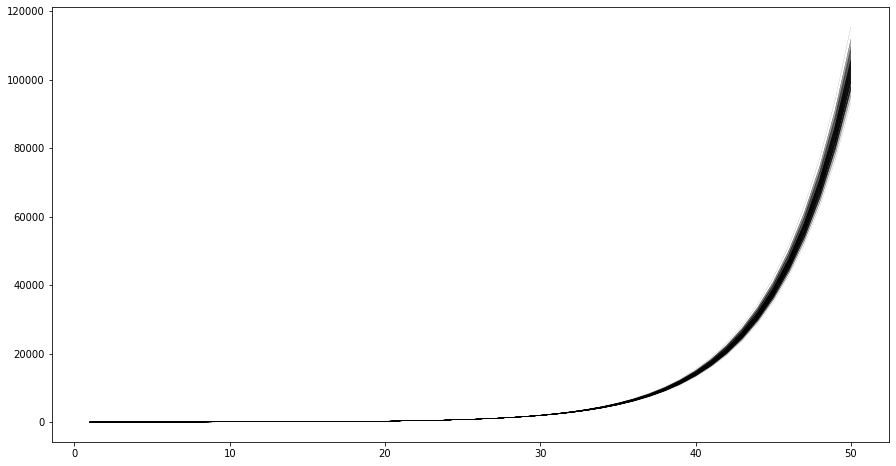

In [14]:
plot_sample_exp(x, current_mu, current_sigma)

*Прогноз к 1 мая*

In [15]:
N_SAMPLE = 1000
DATE_MAY = datetime.datetime(year=2020, month=5, day=1)
DATE_JUNE = datetime.datetime(year=2020, month=6, day=1)
DATE_SEPT = datetime.datetime(year=2020, month=9, day=1)

In [16]:
def predict_in_future_using_sample(date_to, n_sample=100):
    df_date_to = df[(df['date'] >= DATE_FROM) & (df['date'] <= date_to)]

    x_may = np.array([i + 1 for i in range(df_date_to.shape[0])]).reshape(-1, 1)
    NUMBER_MAY_1 = x_may.shape[0]

    collection_weights = np.random.multivariate_normal(current_mu, current_sigma, n_sample)

    collection_predict_may = []
    for weights in collection_weights:
        plt.plot(x_may, np.exp(weights[0] + weights[1] * x_may), 'k-', lw=0.1)

        collection_predict_may.append(np.exp(weights[0] + weights[1] * NUMBER_MAY_1))

    plt.title('Сэмпл экспонент')
    plt.show()

    plt.title(f'Гистограмма заболевших на {date_to.date()}')
    plt.hist(collection_predict_may, bins=20)
    plt.show()

    print(pd.Series(collection_predict_may).describe())
    print('Общее количество заражённых:', int(np.mean(collection_predict_may)))

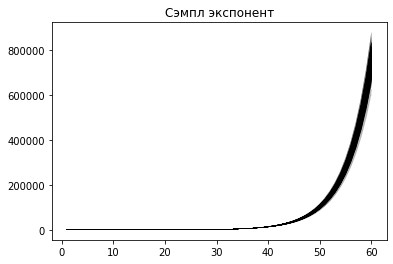

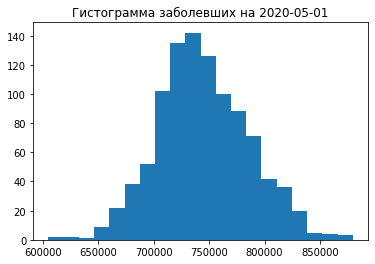

count      1000.000000
mean     744813.961099
std       41217.330662
min      605151.300290
25%      718420.077099
50%      741805.897549
75%      772488.963252
max      879463.265888
dtype: float64
Общее количество заражённых: 744813


In [17]:
predict_in_future_using_sample(DATE_MAY, N_SAMPLE)

*Прогноз к 1 июня*

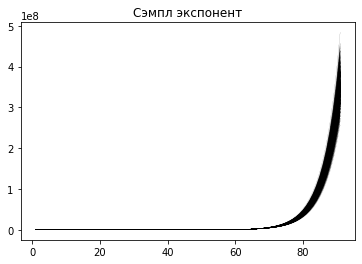

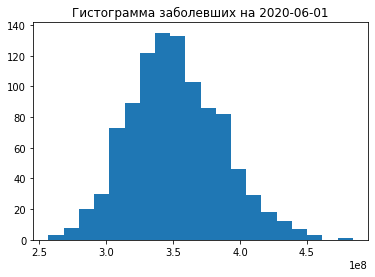

count    1.000000e+03
mean     3.516823e+08
std      3.472201e+07
min      2.568195e+08
25%      3.278053e+08
50%      3.493325e+08
75%      3.762448e+08
max      4.842300e+08
dtype: float64
Общее количество заражённых: 351682341


In [18]:
predict_in_future_using_sample(DATE_JUNE, N_SAMPLE)

*Прогноз к 1 сентября*

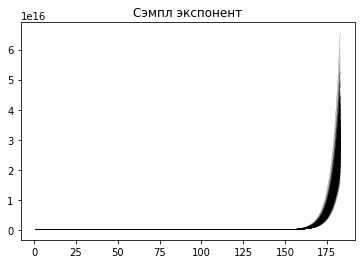

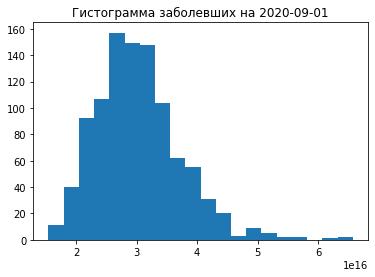

count    1.000000e+03
mean     3.023301e+16
std      7.006123e+15
min      1.540642e+16
25%      2.549798e+16
50%      2.949797e+16
75%      3.383866e+16
max      6.575074e+16
dtype: float64
Общее количество заражённых: 30233014488052776


In [19]:
predict_in_future_using_sample(DATE_SEPT, N_SAMPLE)

## 3 

Дана следующая форма сигмоиды:

$$
\Phi = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{\frac{-t^2}{2}}dt
$$

Для приближения к линейной функции можно заметить, что степень экспоненты может быть представлена в виде любой квадратичной функции (например, $w_0 + w_1x_1 + w_2x_1^2$)

Беря во внимание тот факт, что у нас есть total_cases и new_cases, а также то, что приращение целевой функции y (при total_cases) по x (номеру дня) и есть new_cases:

$$
\frac{dy}{dx} = e^{w_0 + w_1x_1 + w_2x_1^2}
$$

И тогда получим:

$$
\ln(y) = w_0 + w_1x_1 + w_2x_1^2
$$

### 3a Обучение параметров такой сигмоидальной функции при помощи линейной регрессии

In [20]:
FIGSIZE = (15, 8)

In [21]:
x_square = np.concatenate((x, x ** 2), axis=1)

model_sigm = LinearRegression()
model_sigm.fit(x_square, ln_y_new_cases)

y_pred = np.exp(model_sigm.predict(x_square))

print("y = e^(%.4fx + (%.4f)x^2 + (%.4f))" % 
      (model_sigm.coef_[0], model_sigm.coef_[1], model_sigm.intercept_))

y = e^(0.2793x + (-0.0018)x^2 + (-0.6740))


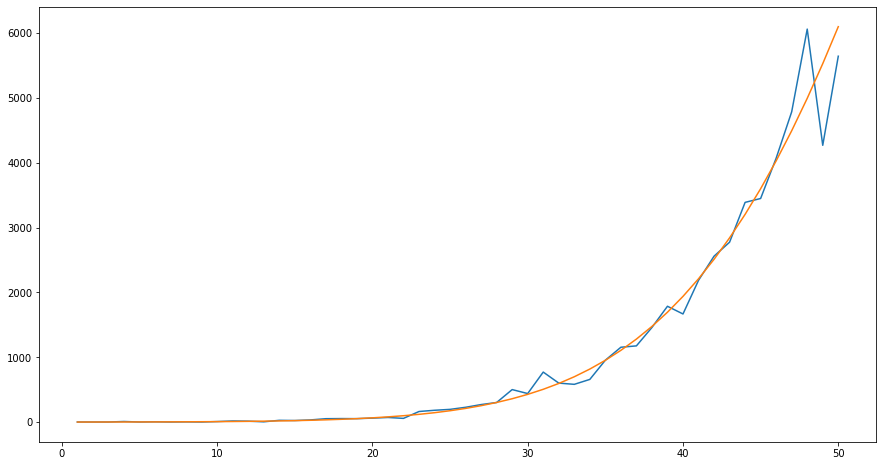

In [22]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot()

plt.plot(x, df_50['new_cases'], label='исходные данные')
plt.plot(x, y_pred.ravel(), label='регрессионная оценка')

plt.show()

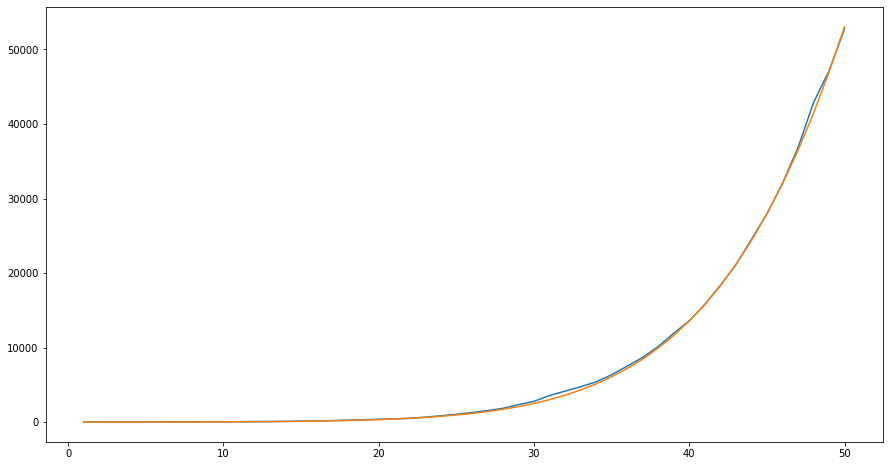

In [23]:
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot()

ax.plot(x, df_50['total_cases'], label='исходные данные')
ax.plot(x, np.cumsum(y_pred), label='регрессионная оценка')

plt.show()

### 3b Апостериорное распределение параметров

In [24]:
def bayesian_update(mu, sigma, x, y, sigma_noise=0.15):
    """Обновление мат. ожидания и дисперсии"""

    x_matrix = np.array([[1] + x.tolist()])
    sigma_n = np.linalg.inv(
        np.linalg.inv(sigma) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix))
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(
        np.transpose(x_matrix), np.array([y])))
    return mu_n, sigma_n

In [25]:
current_mu, current_sigma = np.array([0, 0, 0]), 2 * np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

for px, py in zip(x_square, ln_y_new_cases):
    current_mu, current_sigma = bayesian_update(current_mu, current_sigma, px, py)

print(current_mu)
print(current_sigma)

[-0.67251759  0.27916043 -0.00182777]
[[ 4.38240749e-03 -3.47063225e-04  5.72710389e-06]
 [-3.47063225e-04  3.58763511e-05 -6.61276224e-07]
 [ 5.72710389e-06 -6.61276224e-07  1.29693084e-08]]


### 3b Сэмплирование сигмоид, построение графиков

In [26]:
def predict_sigm_in_future_using_sample(date_to, n_sample=100, figsize=(18, 6)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    df_date_to = df[(df['date'] >= DATE_FROM) & (df['date'] <= date_to)]

    x_date = np.array([i + 1 for i in range(df_date_to.shape[0])]).reshape(-1, 1)

    collection_weights = np.random.multivariate_normal(current_mu, current_sigma, n_sample)

    collection_predict_date = []
    for weights in collection_weights:
        ax1.plot(x_date, np.exp(weights[0] + weights[1] * x_date + weights[2] * (x_date ** 2)), 'k-', lw=0.1)
        ax2.plot(x_date, np.cumsum(np.exp(weights[0] + weights[1] * x_date + weights[2] * (x_date ** 2))), 'k-', lw=0.1)

        collection_predict_date.append(np.cumsum(np.exp(weights[0] + weights[1] * x_date + weights[2] * (x_date ** 2)))[-1])
    
    ax1.set_title('Сэмпл экспонент (new cases)')
    ax2.set_title('Сэмпл экспонент (total cases)')
    plt.show()

    plt.title(f'Гистограмма заболевших на {date_to.date()}')
    plt.hist(collection_predict_date, bins=20)
    plt.show()

    series_collection_predict_date = pd.Series(collection_predict_date)
    print(series_collection_predict_date.describe())
    print('10-й процентиль (количества заражённых):', round(series_collection_predict_date.quantile(0.1)))
    print('90-й процентиль (количества заражённых):', round(series_collection_predict_date.quantile(0.9)))
    print(f'Общее количество заражённых (на {date_to.date()}):', int(np.mean(collection_predict_date)))

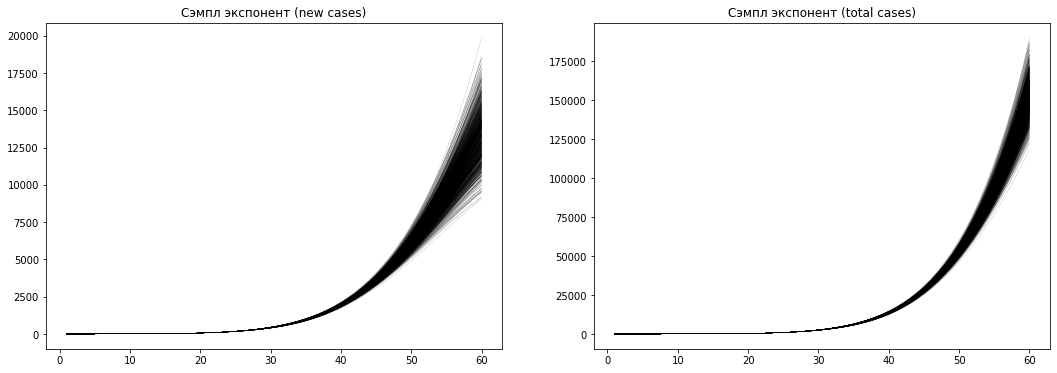

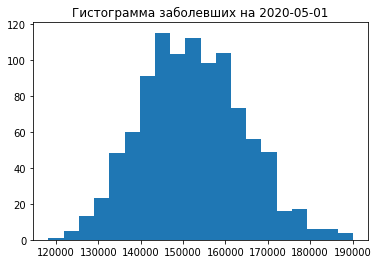

count      1000.000000
mean     152340.115154
std       12065.497543
min      118254.617369
25%      143731.975694
50%      152010.703133
75%      160416.307205
max      190056.060695
dtype: float64
10-й процентиль (количества заражённых): 136995
90-й процентиль (количества заражённых): 168372
Общее количество заражённых (на 2020-05-01): 152340


In [27]:
predict_sigm_in_future_using_sample(DATE_MAY, N_SAMPLE)

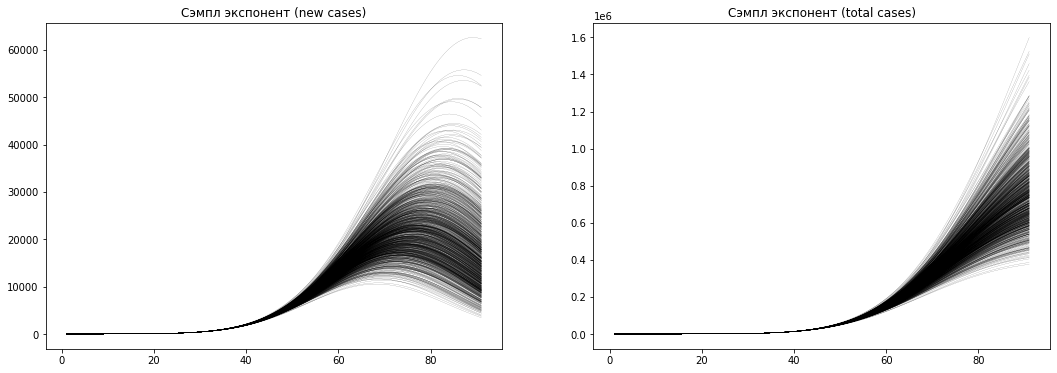

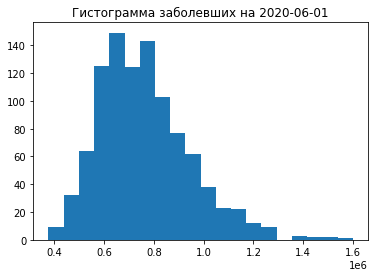

count    1.000000e+03
mean     7.625067e+05
std      1.842755e+05
min      3.755583e+05
25%      6.283333e+05
50%      7.400497e+05
75%      8.656863e+05
max      1.599389e+06
dtype: float64
10-й процентиль (количества заражённых): 552965
90-й процентиль (количества заражённых): 1000102
Общее количество заражённых (на 2020-06-01): 762506


In [28]:
predict_sigm_in_future_using_sample(DATE_JUNE, N_SAMPLE)

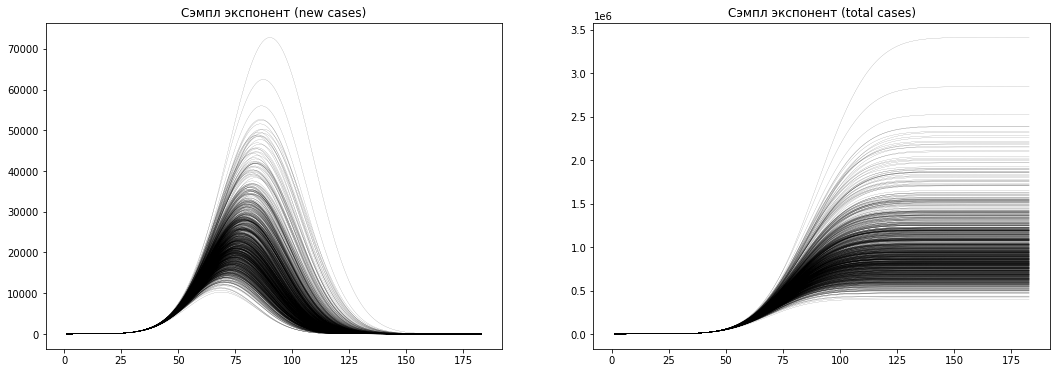

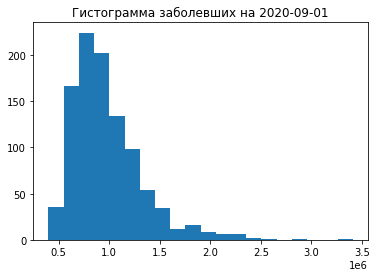

count    1.000000e+03
mean     9.770174e+05
std      3.523205e+05
min      3.981064e+05
25%      7.345648e+05
50%      8.999696e+05
75%      1.138829e+06
max      3.410354e+06
dtype: float64
10-й процентиль (количества заражённых): 624876
90-й процентиль (количества заражённых): 1402457
Общее количество заражённых (на 2020-09-01): 977017


In [29]:
predict_sigm_in_future_using_sample(DATE_SEPT, N_SAMPLE)

## 5 Выводы

По итогу проведённого моделирования данных по коронавирусу можно сказать, что экспоненциальная зависимость крайне плохо отражает действительность по прохождению небольшого количества дней от начала и спустя несколько месяцев показывает нереалистичные цифры по количеству заражённых (например, учитывая, что рассматривается только Россия, а это ~146,3 миллионна людей по оценке Росстата от 28.01.2021).

При этом в сравнении с экспоненциальной зависимостью сигмоида показывает более реалистичные значения, а также приближена к логике насыщения количеством больных данным заболеванием (т.к. население на планете ограниченно ~7,5 млрд людей). Однако стоит отметить, что это по-прежнему не идеальная модель. Так, например, она не учитывает ситуации возникновения новых волн (например, учитывая различные виды covid-19, а также не 100%-ую защиту от повторного случая для переболевшего человека и различные факторы крупномасштабного характера человеческой деятельности).